# Team 3 - Kickstarter

![](https://a.kickstarter.com/assets/site/social/og-kickstarter-social-d58bfe030adf82001e25d3f7015eedb8ab84bc4bf9eeeeede5f8d8b0d02d641a.png)

_For more information about the dataset, read [here](https://www.kaggle.com/kemical/kickstarter-projects)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The format of `launched` column is not consistent with `deadline` column
- Can you calculate the duration of the projects?
- Some projects in `launched` and `deadline` columns have year = 1970, which is way before Kickstarter was born!
- And more...


In [1]:
# Start your codes here!
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time
import os

In [2]:
#read data
data = pd.read_csv('kickstarter.csv')

In [3]:
#explore data

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
data.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
231218,245233018,The Book of Blessed Beasts (Canceled),Publishing,Publishing,USD,2014-03-04,8500.0,2014-01-03 16:19:51,1518.00,canceled,45,US,1518.00,1518.00,8500.0
89347,145395733,Skies of Fire,Comics,Comics,USD,2014-04-11,4500.0,2014-03-12 17:25:04,14910.37,successful,525,US,14910.37,14910.37,4500.0
211147,2076128553,"Traditional, Gluten-free and Vegan Cupcakes",Restaurants,Food,USD,2014-09-30,1500.0,2014-08-01 06:08:51,45.00,failed,3,US,45.00,45.00,1500.0
310512,651670390,Prompt IRL: A Writing Journal + Anthology,Publishing,Publishing,USD,2016-05-27,4000.0,2016-05-06 23:05:34,5426.29,successful,115,US,5426.29,5426.29,4000.0
190236,196826583,ParaQuarter,Art,Art,USD,2014-08-23,100.0,2014-07-24 19:19:05,28.00,failed,6,US,28.00,28.00,100.0


In [6]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
#data[pd.isnull(data['name'])].index
data[data['name'].isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [8]:
data[data['usd pledged'].isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [9]:
data.drop(['usd pledged','goal','pledged'], axis = 1, inplace = True)

In [10]:
data['pledged_ratio'] = data['usd_pledged_real']/ data['usd_goal_real']


In [11]:
data.sample(5)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
376284,987903062,Dance Art Fusion: A Multicultural Space in Tan...,Art,Art,EUR,2016-07-09,2016-06-14 20:24:41,successful,52,ES,4111.81,3894.82,1.055712
300479,600057411,Help Us Complete Our Album,Rock,Music,USD,2012-04-09,2012-04-02 02:01:38,successful,11,US,305.00,300.00,1.016667
321320,706276000,"""She was cold, very cold!"" The true story of ...",Nonfiction,Publishing,USD,2014-07-23,2014-06-23 18:39:49,failed,2,US,36.00,2499.00,0.014406
122870,1624029480,GO ON TOUR,Hip-Hop,Music,USD,2014-12-21,2014-11-21 22:22:03,failed,0,US,0.00,5000.00,0.000000
64584,1328384117,The Sisterhood of Blood - Playing Cards,Playing Cards,Games,GBP,2016-05-31,2016-05-01 12:57:39,successful,493,GB,14735.38,14432.31,1.020999


In [12]:
data.sort_values(by="pledged_ratio", ascending=False)[:10]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,2016-08-18 09:04:03,successful,3917,US,104277.89,1.00,104277.89000
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,2016-10-14 19:04:27,successful,955,US,68764.10,1.00,68764.10000
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,2015-08-10 19:31:56,successful,1673,US,55266.57,1.00,55266.57000
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,2013-05-10 01:22:38,successful,1622,US,41535.01,1.00,41535.01000
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,2016-07-12 00:29:12,successful,268,US,32843.00,1.00,32843.00000
285408,521903377,CLOCKWRIGHT: Large-Scale Analogue Time Machines,Sculpture,Art,USD,2016-01-13,2015-12-14 12:57:33,successful,162,US,27588.23,1.00,27588.23000
369214,951161619,Heartbreak Hits – Theo Katzman's Second LP,Music,Music,USD,2017-01-03,2016-11-04 15:52:18,successful,665,US,24675.00,1.00,24675.00000
290936,550443638,"Penny Arcade's Podcast, ""Downloadable Content""...",Radio & Podcasts,Publishing,USD,2013-05-31,2013-05-08 20:02:14,successful,5001,US,230360.67,10.00,23036.06700
15288,1077219132,THE 'mi8' RISES | The Best Wireless Duo Stereo...,Hardware,Technology,USD,2016-10-13,2016-09-13 18:03:12,successful,163,US,22603.00,1.00,22603.00000
164449,1836862932,CO-OP THE GAME (Canceled),Video Games,Games,CAD,2013-10-14,2013-09-09 23:15:12,canceled,35,CA,16461.73,0.97,16970.85567


In [13]:
data.sort_values(by="usd_pledged_real", ascending=False)[:3]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,2015-02-24 15:44:42,successful,78471,US,20338986.27,500000.0,40.677973
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,2014-07-08 10:14:37,successful,62642,US,13285226.36,50000.0,265.704527
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,2016-05-24 15:49:52,successful,66673,US,12779843.49,1000000.0,12.779843


In [14]:
data['main_category'].unique()
#data['category'].unique()


array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

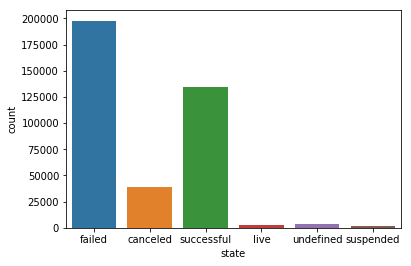

In [15]:

sns.countplot(x='state', data=data)
data['state'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

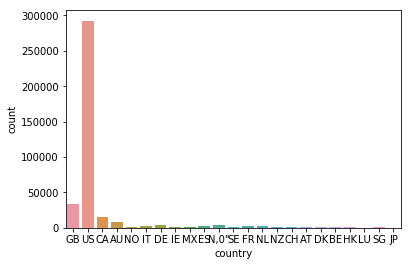

In [16]:
sns.countplot(x='country', data=data)
data['country'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

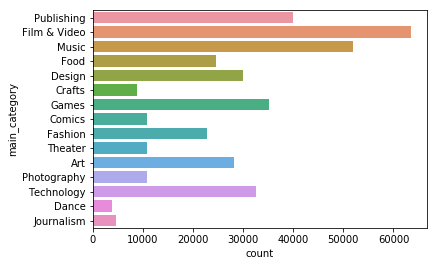

In [17]:
sns.countplot(y='main_category', data=data,orient="h")
data['main_category'].value_counts()

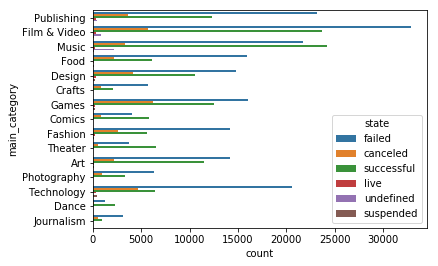

In [18]:
#dance , music, comics có so luong startup thanh cong cao hon cac danh muc con lai
sns.countplot(y='main_category', hue='state', data=data,orient="h")

In [19]:
data.corr()
#trong nhung cot co san thi so luong nguoi ung ho có lien quan toi so tien nhan dc 

,ID,backers,usd_pledged_real,usd_goal_real,pledged_ratio
ID,1.000000,0.000654,-0.000025,0.001854,-0.000838
backers,0.000654,1.000000,0.752539,0.004517,0.016605
usd_pledged_real,-0.000025,0.752539,1.000000,0.005596,0.009006
usd_goal_real,0.001854,0.004517,0.005596,1.000000,-0.000449
pledged_ratio,-0.000838,0.016605,0.009006,-0.000449,1.000000


In [20]:
def year_cut(string):
    return string[0:4]

def month_cut(string):
    return string[5:7]

def day_cut(string):
    return string[8:10]
#cut collumn launched
data['year'] = data['launched'].apply(year_cut)
data['month'] = data['launched'].apply(month_cut)
data['day'] = data['launched'].apply(day_cut)
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
#cut collumn deadline
data['year_deadline'] = data['deadline'].apply(year_cut)
data['month_deadline'] = data['deadline'].apply(month_cut)
data['day_deadline'] = data['deadline'].apply(day_cut)
data['year_deadline'] = data['year_deadline'].astype(int)
data['month_deadline'] = data['month_deadline'].astype(int)
data['day_deadline'] = data['day_deadline'].astype(int)

#calculate duration
#data['year_dur'] = abs((data['year_deadline'].values - data['year'].values))
#data['month_dur'] = (data['month_deadline'].values - data['month'].values)
#data['day_dur'] = (data['day_deadline'].values - data['day'].values)
#data['Duration_total_day'] = data['year_dur'].values*360 + (data['month_dur'].values*30) + data['day_dur'].values
data['Duration_total_day'] = (data['year_deadline'].values - data['year'].values)*360 + (data['month_deadline'].values - data['month'].values)*30 + (data['day_deadline'].values - data['day'].values)

In [21]:
#data[data["year_dur"] == 1]
data.sample(5)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio,year,month,day,year_deadline,month_deadline,day_deadline,Duration_total_day
249388,338443599,"Breakfast, Lunch and Dinner, a fascinating doc...",Film & Video,Film & Video,CAD,2014-01-10,2013-11-26 20:19:22,failed,12,CA,1884.88,68959.18,0.027333,2013,11,26,2014,1,10,44
329104,746728803,Amplifiear: Better sound for the new iPad and ...,Product Design,Design,USD,2012-05-12,2012-04-12 20:27:31,successful,1453,US,45691.01,10000.00,4.569101,2012,4,12,2012,5,12,30
292786,560217656,Los Angeles Source,Apparel,Fashion,USD,2016-03-24,2016-02-23 07:04:28,failed,1,US,1.00,10000.00,0.000100,2016,2,23,2016,3,24,31
199616,2016527585,Numericons,Graphic Design,Design,USD,2017-10-19,2017-09-19 16:51:43,failed,24,US,1041.00,5000.00,0.208200,2017,9,19,2017,10,19,30
302589,610854175,DONATA: In the Mind of a Victim,Publishing,Publishing,USD,2014-12-23,2014-12-13 13:21:24,successful,45,US,2000.00,1000.00,2.000000,2014,12,13,2014,12,23,10


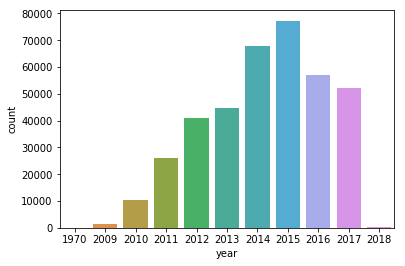

In [22]:
sns.countplot(x='year', data=data)

In [23]:
success_ratio_year = []

for year in range(2009, 2019):
    success = len (data[(data['year'] == year) & (data['state'] == 'successful')]['state'])
    overall = len (data[data['year'] == year]['year'])
    ratio = success/ overall
    success_ratio_year.append(ratio)
    print ("success_ratio_year = ",year, ratio * 100, '%')

success_ratio_year =  2009 43.566591422121896 %
success_ratio_year =  2010 43.66384637322939 %
success_ratio_year =  2011 46.38868773106681 %
success_ratio_year =  2012 43.46410785861776 %
success_ratio_year =  2013 43.28777507747876 %
success_ratio_year =  2014 31.156542918296555 %
success_ratio_year =  2015 27.129366106080205 %
success_ratio_year =  2016 32.81687185226637 %
success_ratio_year =  2017 35.367816091954026 %
success_ratio_year =  2018 0.0 %


In [24]:
failed_ratio_year = []

for year in range(2009, 2019):
    failed = len (data[(data['year'] == year) & (data['state'] == 'failed')]['state'])
    overall = len (data[data['year'] == year]['year'])
    ratio = failed/ overall
    failed_ratio_year.append(ratio)
    print ("failed_ratio_year = ",year, ratio * 100, '%')

failed_ratio_year =  2009 45.146726862302486 %
failed_ratio_year =  2010 47.38092974617359 %
failed_ratio_year =  2011 45.27194420093761 %
failed_ratio_year =  2012 50.01336086481234 %
failed_ratio_year =  2013 48.35120733094023 %
failed_ratio_year =  2014 56.38644918444166 %
failed_ratio_year =  2015 57.3104786545925 %
failed_ratio_year =  2016 53.382064913262454 %
failed_ratio_year =  2017 47.810344827586206 %
failed_ratio_year =  2018 0.0 %


In [25]:
def sieu_du_an(n):
    if n < 100000:
        return 'du_an_nho'
    elif n < 500000:
        return 'du_an_bthuong'
    elif n < 2000000:
        return 'du_an_trung_binh'
    elif n < 5000000:
        return 'du_an_cao'
    else:
        return 'Sieu_du_an'

In [26]:
data['sieu_du_an'] = data['usd_pledged_real'].apply(sieu_du_an)

In [27]:
data['sieu_du_an'].value_counts()

du_an_nho           373710
du_an_bthuong         4234
du_an_trung_binh       621
du_an_cao               75
Sieu_du_an              21
Name: sieu_du_an, dtype: int64

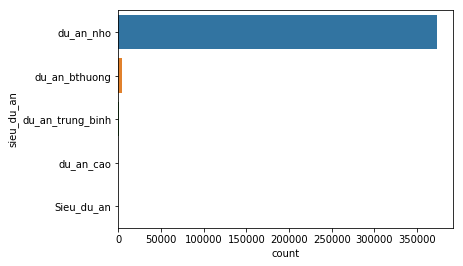

In [28]:
sns.countplot(y = data['sieu_du_an'],orient ='h')

In [29]:
data[data['sieu_du_an'] =='Sieu_du_an'].sample(1)
#usd_goal_real*pledged_ratio = usd_pledged_real

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,...,usd_goal_real,pledged_ratio,year,month,day,year_deadline,month_deadline,day_deadline,Duration_total_day,sieu_du_an
368573,947809001,Shenmue 3,Video Games,Games,USD,2015-07-18,2015-06-16 03:51:04,successful,69320,US,...,2000000.0,3.166648,2015,6,16,2015,7,18,32,Sieu_du_an


In [30]:
du_an_nhieu_tien_nhat = data.sort_values(by=['usd_pledged_real'], ascending=False)[['name', 'main_category', 'usd_pledged_real']].head(10)
du_an_nhieu_tien_nhat

,name,main_category,usd_pledged_real
157270,"Pebble Time - Awesome Smartwatch, No Compromises",Design,20338986.27
250254,COOLEST COOLER: 21st Century Cooler that's Act...,Design,13285226.36
216629,"Pebble 2, Time 2 + All-New Pebble Core",Design,12779843.49
289915,Kingdom Death: Monster 1.5,Games,12393139.69
282416,Pebble: E-Paper Watch for iPhone and Android,Design,10266845.74
293861,The World's Best TRAVEL JACKET with 15 Feature...,Design,9192055.66
187652,Exploding Kittens,Games,8782571.99
6665,OUYA: A New Kind of Video Game Console,Games,8596474.58
309630,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Games,7072757.00
271276,"The Everyday Backpack, Tote, and Sling",Design,6565782.50


In [31]:
most_invest_category = data.iloc[du_an_nhieu_tien_nhat.index]
most_invest_category

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,...,usd_goal_real,pledged_ratio,year,month,day,year_deadline,month_deadline,day_deadline,Duration_total_day,sieu_du_an
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,2015-02-24 15:44:42,successful,78471,US,...,500000.0,40.677973,2015,2,24,2015,3,28,34,Sieu_du_an
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,2014-07-08 10:14:37,successful,62642,US,...,50000.0,265.704527,2014,7,8,2014,8,30,52,Sieu_du_an
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,2016-05-24 15:49:52,successful,66673,US,...,1000000.0,12.779843,2016,5,24,2016,6,30,36,Sieu_du_an
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,2016-11-25 06:01:41,successful,19264,US,...,100000.0,123.931397,2016,11,25,2017,1,8,43,Sieu_du_an
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,2012-04-11 06:59:04,successful,68929,US,...,100000.0,102.668457,2012,4,11,2012,5,19,38,Sieu_du_an
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,2015-07-07 13:52:34,successful,44949,US,...,20000.0,459.602783,2015,7,7,2015,9,3,56,Sieu_du_an
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,2015-01-20 19:00:19,successful,219382,US,...,10000.0,878.257199,2015,1,20,2015,2,20,30,Sieu_du_an
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,2012-07-10 14:44:41,successful,63416,US,...,950000.0,9.048921,2012,7,10,2012,8,9,29,Sieu_du_an
309630,647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,2017-09-26 20:00:02,successful,43733,US,...,40000.0,176.818925,2017,9,26,2017,10,19,23,Sieu_du_an
271276,450099426,"The Everyday Backpack, Tote, and Sling",Product Design,Design,USD,2016-09-10,2016-07-13 00:47:35,successful,26359,US,...,500000.0,13.131565,2016,7,13,2016,9,10,57,Sieu_du_an


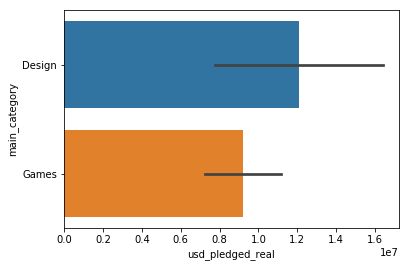

In [32]:
sns.barplot(data=most_invest_category, y='main_category', x='usd_pledged_real',ci = 'sd')

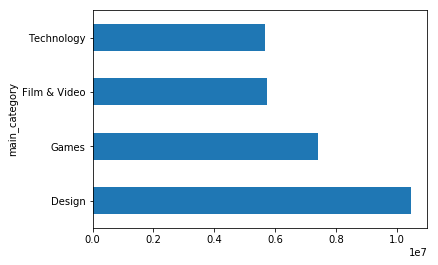

In [33]:
sieu_du_an_group = data[data['sieu_du_an'] == "Sieu_du_an"].groupby('main_category').mean()
sieu_du_an_group.sort_values(by=['usd_pledged_real'], ascending=False)['usd_pledged_real'].head(10).plot(kind='barh')

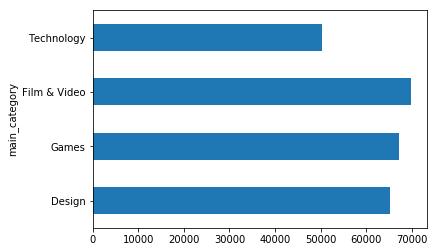

In [34]:
sieu_du_an_group.sort_values(by=['usd_pledged_real'], ascending=False)['backers'].head(10).plot(kind='barh')

In [35]:
data_year = {}
for year in range(2009, 2019):
    data_year[year] = data[data['year'] == year]['year'].count()

data_year = pd.Series(data_year)
data_year = pd.DataFrame(data_year)
data_year = data_year.rename(columns = {0: "total_projects"})




backers_year = {}
for year in range(2009, 2019):
    backers_count = data[data['year'] == year]['backers'].sum()
    backers_year[year] = backers_count

data_year['total_backers'] = pd.Series(backers_year)

data_year



,total_projects,total_backers
2009,1329,43758
2010,10519,406875
2011,26237,1396473
2012,41165,4343786
2013,44851,6292568
2014,67745,6194576
2015,77300,7512058
2016,57184,7148604
2017,52200,6653360
2018,124,1161


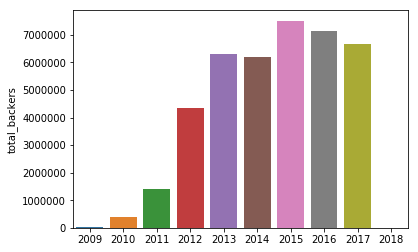

In [36]:
sns.barplot(data_year['total_backers'].index, y= data_year['total_backers'])

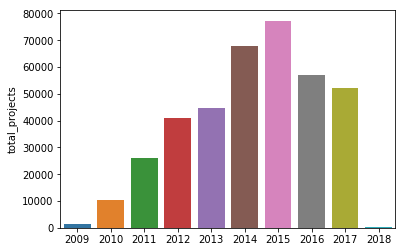

In [37]:
sns.barplot(data_year['total_projects'].index, y= data_year['total_projects'])

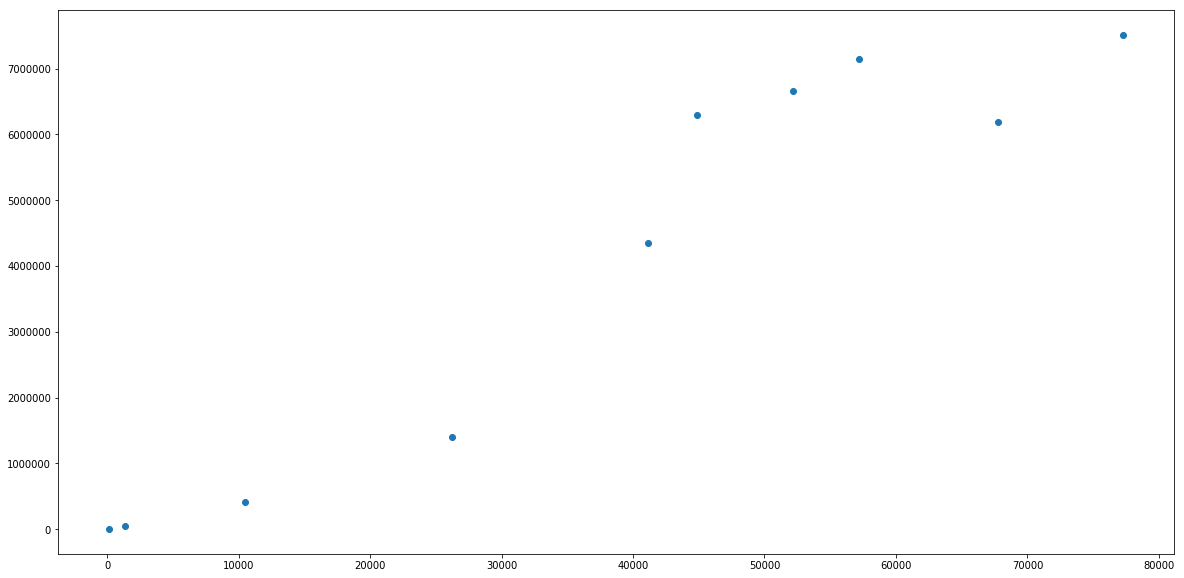

In [38]:
plt.figure(figsize=(20, 10))
plt.scatter(data_year["total_projects"],data_year["total_backers"])
plt.show()

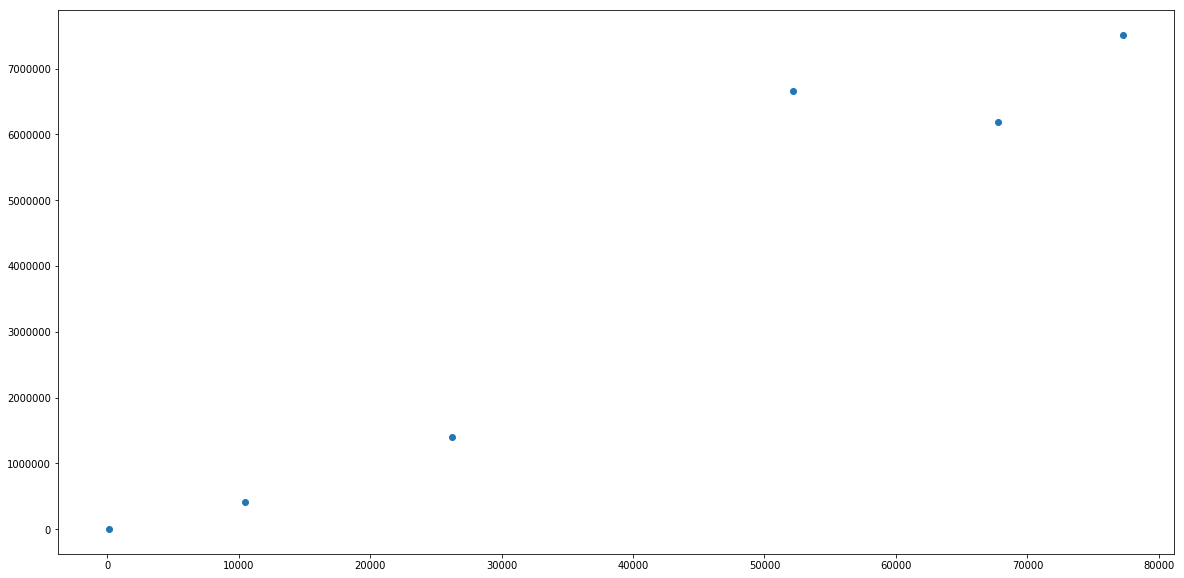

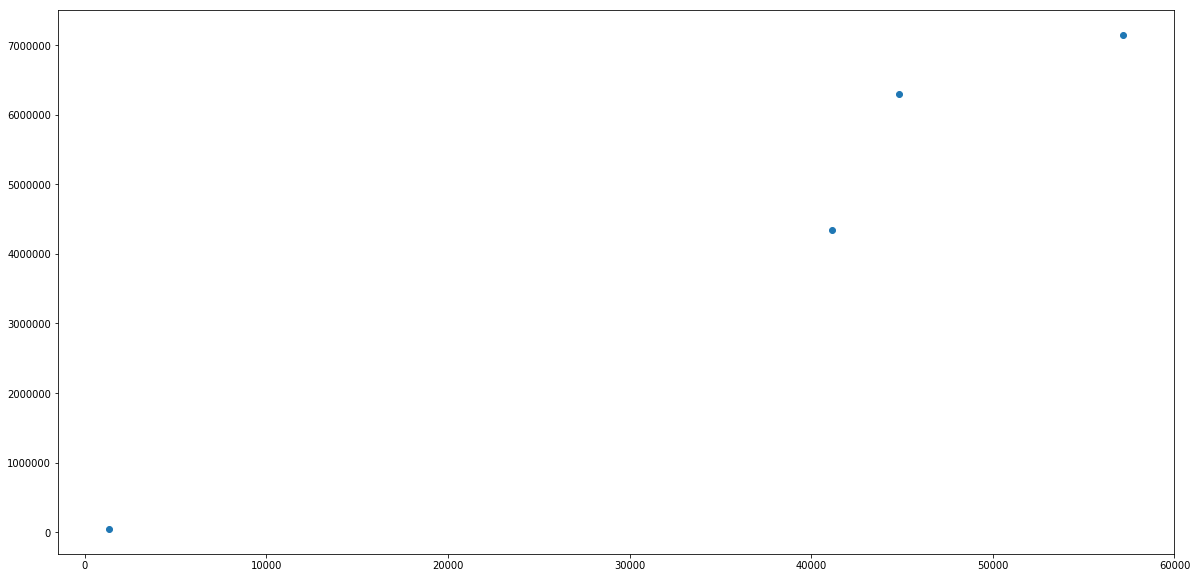

In [52]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_year[['total_projects']], data_year['total_backers'], test_size=0.4)

X_train = X_train.sort_index()
y_train = y_train.sort_index()

plt.figure(figsize=(20, 10))
plt.scatter(X_train,y_train)

plt.figure(figsize=(20, 10))
plt.scatter(X_test,y_test)
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [57]:

poly_reg = PolynomialFeatures(degree=1)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

lm = linear_model.LinearRegression()

lm.fit(X_train_poly,y_train)

y_train_predict = lm.predict(X_train_poly)

y_test_predict = lm.predict(X_test_poly)

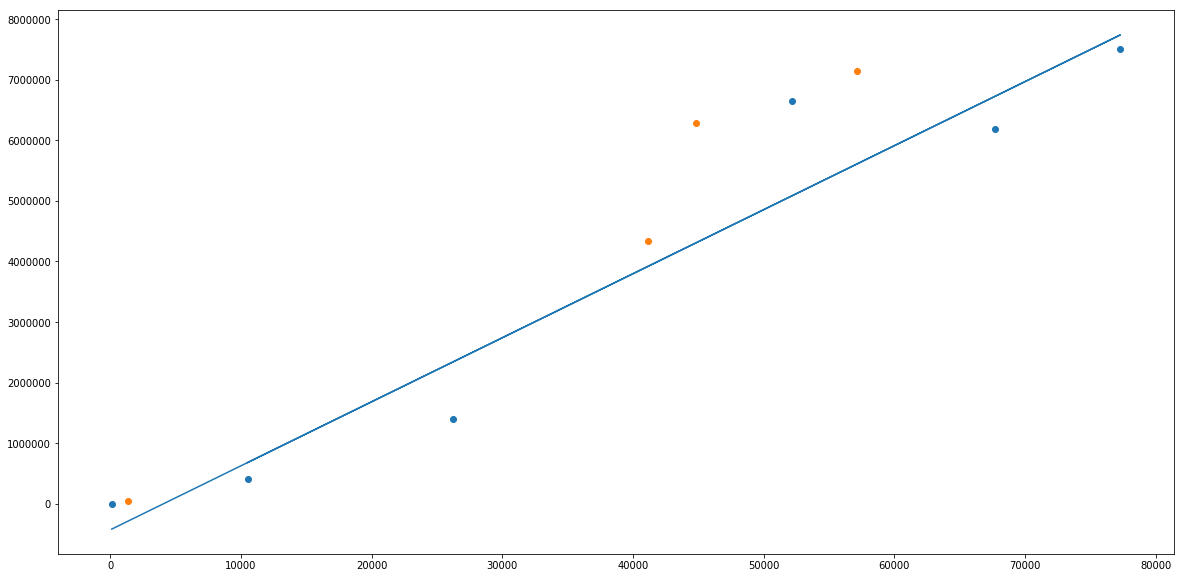

In [58]:
# Now if you did everything correctly this code below should be able to visualize the result
plt.figure(figsize=(20, 10))
plt.plot(X_train, y_train_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

In [79]:
pledged_sum = {}
for category in list(set(data['main_category'])):
    amount = data[data['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
cate_df = pd.Series(pledged_sum)
cate_df = pd.DataFrame(cate_df)
cate_df = cate_df.rename(columns = {0:"pledged_sum"})


back_cate = {}

for category in set(data['main_category']):
    backers = data[data['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
cate_df['backers'] = backers


cate_count = {}
for category in list(set(data['main_category'])):
    count = data[data['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
cate_df['project_count'] = pd.Series(cate_count)


success = {}
for category in list(set(data['main_category'])):
    success_count = len(data[(data['main_category'] == category) & 
         (data['state'] == "successful")])
    success[category] = success_count

cate_df["success_count"] = pd.Series(success)


cate_df

,pledged_sum,backers,project_count,success_count
Publishing,1.335760e+08,2231589,39874,12300
Dance,1.301070e+07,161275,3768,2338
Games,7.413273e+08,11336829,35231,12518
Technology,6.888725e+08,5356513,32569,6434
Photography,3.850161e+07,428078,10779,3305
Theater,4.371658e+07,513536,10913,6534
Journalism,1.243767e+07,182091,4755,1012
Music,2.003187e+08,2708475,51918,24197
Fashion,1.303353e+08,1401993,22816,5593
Crafts,1.438428e+07,240342,8809,2115


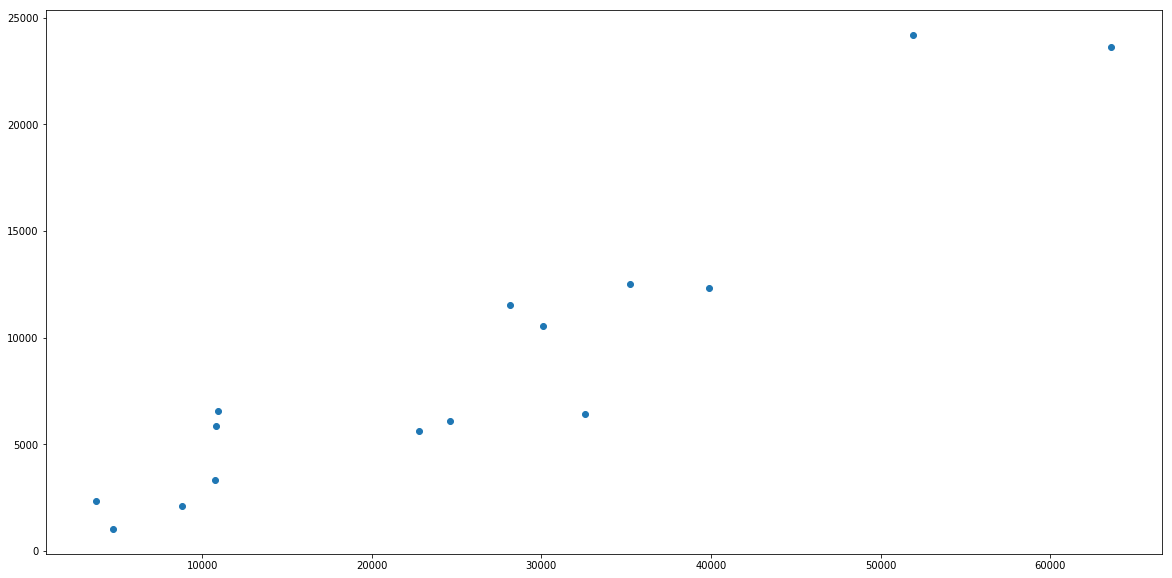

In [80]:
plt.figure(figsize=(20, 10))
plt.scatter(cate_df["project_count"],cate_df["success_count"])
plt.show()

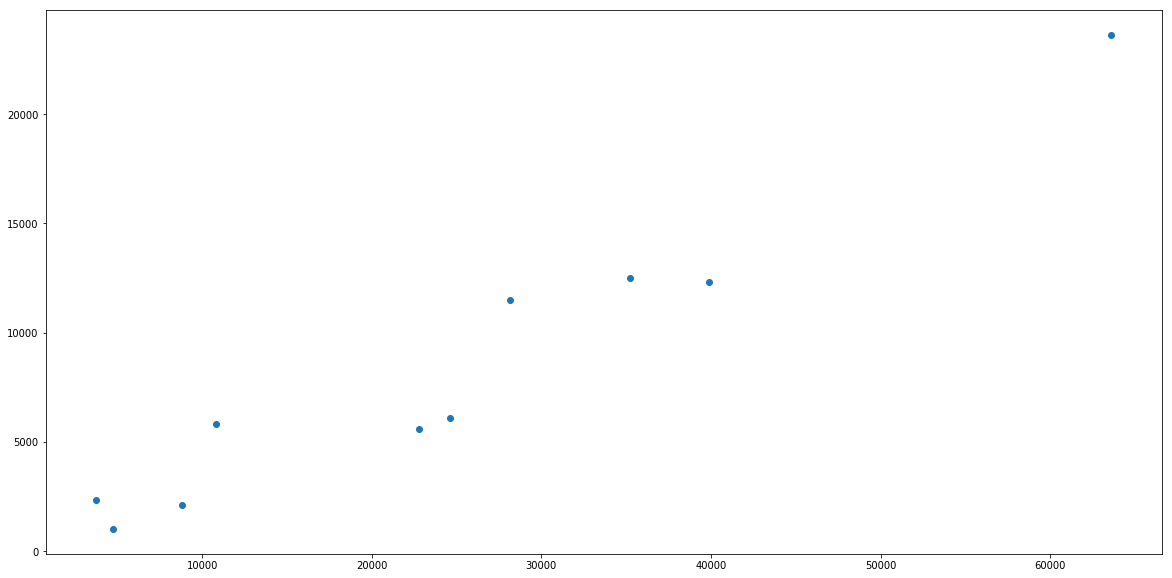

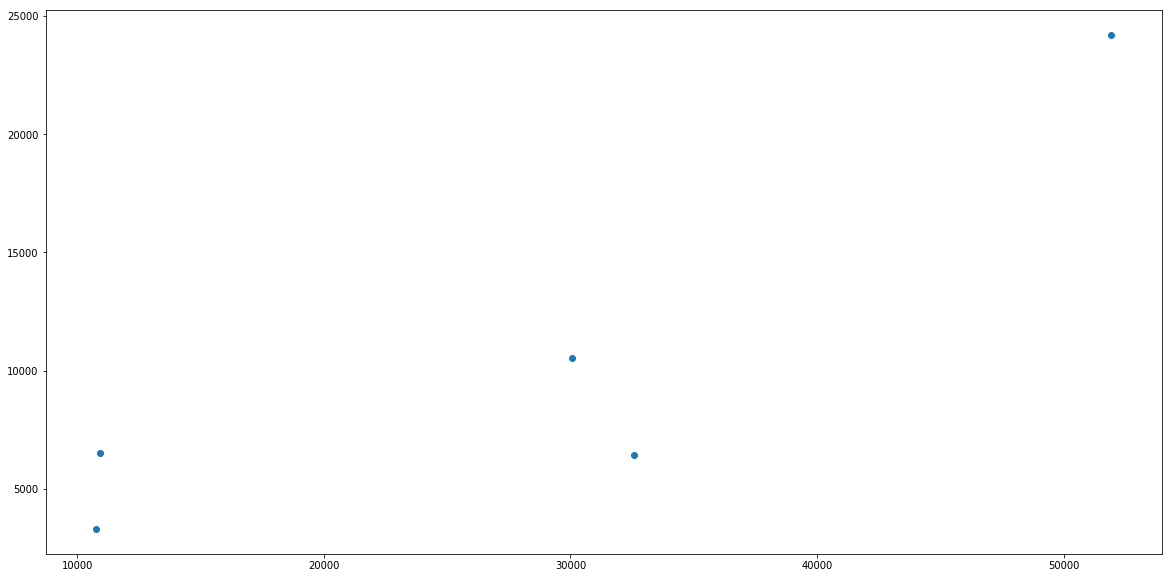

In [81]:

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(cate_df[['project_count']], cate_df['success_count'], test_size=0.3)

X1_train = X1_train.sort_index()
y1_train = y1_train.sort_index()

plt.figure(figsize=(20, 10))
plt.scatter(X1_train,y1_train)

plt.figure(figsize=(20, 10))
plt.scatter(X1_test,y1_test)
plt.show()

In [86]:

poly_reg = PolynomialFeatures(degree=1)


X1_train_poly = poly_reg.fit_transform(X1_train)
X1_test_poly = poly_reg.fit_transform(X1_test)

lm = linear_model.LinearRegression()

lm.fit(X1_train_poly,y1_train)

y1_train_predict = lm.predict(X1_train_poly)

y1_test_predict = lm.predict(X1_test_poly)

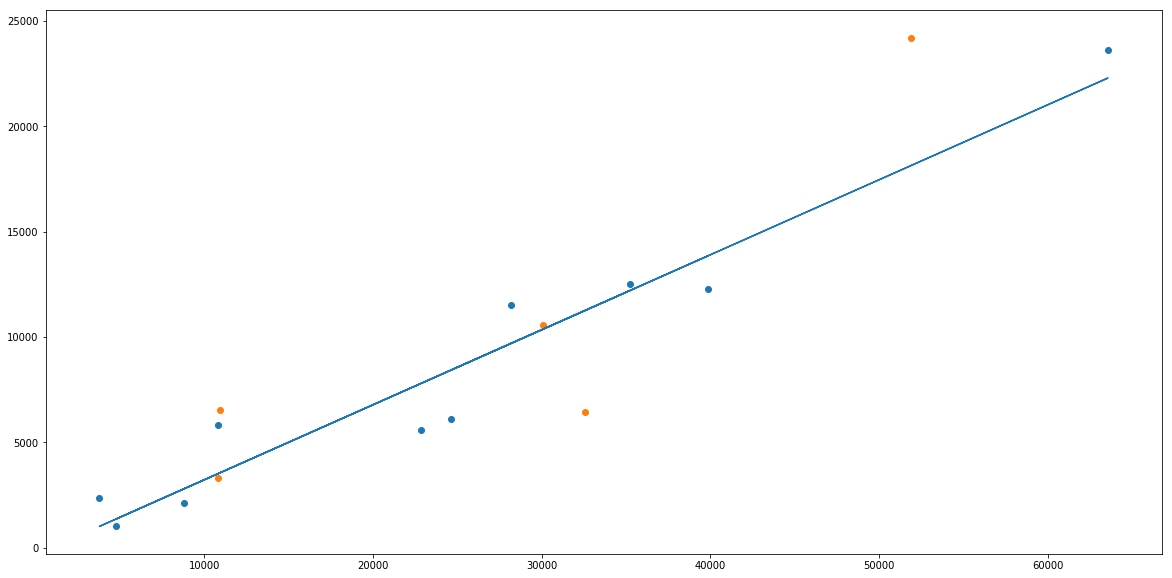

In [87]:
plt.figure(figsize=(20, 10))
plt.plot(X1_train, y1_train_predict)
plt.scatter(X1_train, y1_train)
plt.scatter(X1_test, y1_test)
plt.show()

In [ ]:
#https://datastudio.google.com/s/t6MhNYFQ6EI